<a href="https://colab.research.google.com/github/Devisriram/Basic-ML/blob/main/SpaceX_Missions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explorative Data Analysis (EDA)**


Explorative Data Analysis is a process where one learns about the data, forms insights and identifies important columns (features) that can be user to tell a story or later formulate a ML problem.



The Data set contains about the information regarding SpaceX Mission and details regarding each and every mession that has been done by SpaceX.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline



> The warnings library has been imported to supress the warnings using the command warnings.filterwarnings("ignore")



In [45]:
spacex_data = pd.read_csv("/Spacex.csv")

The data has been imported as a dataset into variable data using the method .read_csv() method of Pandas library.

> The size of data can be known using shape as below.



In [46]:
spacex_data.shape

(41, 16)

It indicates that the data contains 41 observations with 16 features..


> The .head() and .tail() methods can be used to show a dataframe consisting of first five rows and last five rows respectively.





In [11]:
spacex_data.head()

,Flight_Number,Launch_Date,Launch_Time,Launch_Site,Vehicle_Type,Payload_Name,Payload_Type,Payload_Mass_(kg),Payload_Orbit,Customer_Name,Customer_Type,Customer_Country,Mission_Outcome,Failure_Reason,Landing_Type,Landing_Outcome
0,F1-1,24-Mar-06,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21-Mar-07,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,03-Aug-08,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,03-Aug-08,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,03-Aug-08,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


the above is result that occured by using the head() method.

In [12]:
spacex_data.tail()

,Flight_Number,Launch_Date,Launch_Time,Launch_Site,Vehicle_Type,Payload_Name,Payload_Type,Payload_Mass_(kg),Payload_Orbit,Customer_Name,Customer_Type,Customer_Country,Mission_Outcome,Failure_Reason,Landing_Type,Landing_Outcome
36,FT-7,18-Jul-16,04:45,Cape Canaveral AFS LC-40,Falcon 9 Full Thrust (v1.2),SpaceX CRS-9,Space Station Supplies,2257.0,Low Earth Orbit,NASA,Government,United States,Success,NaN,Land,Success
37,FT-8,14-Aug-16,05:26,Cape Canaveral AFS LC-40,Falcon 9 Full Thrust (v1.2),JCSAT-16,Communication Satellite,4600.0,Geostationary Transfer Orbit,SKY Perfect JSAT Group,Business,Japan,Success,NaN,Ship,Success
38,FT-9,01-Sep-16,13:07,Cape Canaveral AFS LC-40,Falcon 9 Full Thrust (v1.2),Amos-6,Communication Satellite,5500.0,Geostationary Transfer Orbit,Spacecom,Business,Israel,Failure,Vehicle Explosion Before Launch,NaN,NaN
39,FT-10,14-Jan-17,17:54,Vandenberg AFB SLC-4E,Falcon 9 Full Thrust (v1.2),Iridium NEXT 1-10,Communication Satellite,9600.0,Low Earth Orbit,Iridium Communications,Business,United States,Success,NaN,Ship,Success
40,FT-11,19-Feb-17,14:39,Kennedy Space Center LC-39A,Falcon 9 Full Thrust (v1.2),SpaceX CRS-10,Space Station Supplies,2490.0,Low Earth Orbit,NASA,Government,United States,Success,NaN,Land,Success


the above is the result that occured by using tail() method..

> Now we will display the colums that are present in our data.


In [13]:
spacex_data.columns

Index(['Flight_Number', 'Launch_Date', 'Launch_Time', 'Launch_Site',
       'Vehicle_Type', 'Payload_Name', 'Payload_Type', 'Payload_Mass_(kg)',
       'Payload_Orbit', 'Customer_Name', 'Customer_Type', 'Customer_Country',
       'Mission_Outcome', 'Failure_Reason', 'Landing_Type', 'Landing_Outcome'],
      dtype='object')



> Now we will find the in how many observations this colums (features) has no null values..



In [14]:
spacex_data.count()

Flight_Number        41
Launch_Date          41
Launch_Time          41
Launch_Site          41
Vehicle_Type         41
Payload_Name         41
Payload_Type         38
Payload_Mass_(kg)    33
Payload_Orbit        36
Customer_Name        39
Customer_Type        39
Customer_Country     39
Mission_Outcome      41
Failure_Reason        8
Landing_Type         28
Landing_Outcome      21
dtype: int64



> Now we will what kind of Vehicle Types does SpaceX has launced by using unique() method..



In [15]:
spacex_data.Vehicle_Type.unique()

array(['Falcon 1', 'Falcon 9 (v1.0)', 'Falcon 9 (v1.1)',
       'Falcon 9 Full Thrust (v1.2)'], dtype=object)

it tells that the given data has 4 types of Vehicle Types.



> .describe() method gives mean, min, max, median, Q1 and Q3.





In [16]:
spacex_data.describe()

,Payload_Mass_(kg)
count,33.000000
mean,2739.772727
std,2131.502973
min,8.000000
25%,570.000000
50%,2490.000000
75%,4159.000000
max,9600.000000


Here, the statistical terms for the Payload_Mass_(kg) from the given data

> Features, values and their data types present in a Data frame can be fount with the method .info() . It is found that all cells are non empty.



In [17]:
spacex_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flight_Number      41 non-null     object 
 1   Launch_Date        41 non-null     object 
 2   Launch_Time        41 non-null     object 
 3   Launch_Site        41 non-null     object 
 4   Vehicle_Type       41 non-null     object 
 5   Payload_Name       41 non-null     object 
 6   Payload_Type       38 non-null     object 
 7   Payload_Mass_(kg)  33 non-null     float64
 8   Payload_Orbit      36 non-null     object 
 9   Customer_Name      39 non-null     object 
 10  Customer_Type      39 non-null     object 
 11  Customer_Country   39 non-null     object 
 12  Mission_Outcome    41 non-null     object 
 13  Failure_Reason     8 non-null      object 
 14  Landing_Type       28 non-null     object 
 15  Landing_Outcome    21 non-null     object 
dtypes: float64(1), object(15)
me

In [18]:
spacex_data.isnull().sum()

Flight_Number         0
Launch_Date           0
Launch_Time           0
Launch_Site           0
Vehicle_Type          0
Payload_Name          0
Payload_Type          3
Payload_Mass_(kg)     8
Payload_Orbit         5
Customer_Name         2
Customer_Type         2
Customer_Country      2
Mission_Outcome       0
Failure_Reason       33
Landing_Type         13
Landing_Outcome      20
dtype: int64

From above,it is known that the features Payload_type, Payload_Mass_(kg), Payload_Orbit, Customer_Name, Customer_Type, Customer_Country, Failure_Reason, Landing_Type and Landing_Outcome has null values,And this Null values has to be filled.



> By using the value_counts() method we can find the number of occurences of each value.



In [19]:
spacex_data.Customer_Country.value_counts()

United States      23
Thailand            2
Japan               2
France (Mexico)     2
Bermuda             2
Luxembourg          2
China               2
Canada              1
Israel              1
Malaysia            1
Turkmenistan        1
Name: Customer_Country, dtype: int64

From the above result we can say that, the dataset is said to be not a Balanced DataSet.



# **Data visualization**


> Data visualization is the act of taking information (data) and placing it into a visual context , such as a map or graph. Data visualizations make big and small data easier for the human brain to understand, and visualization also makes it easier to detect patterns, trends, and outliers in groups of data.

Data visualization is mostly carried out by using the libraries matplotlib and seaborn.



**Bar Graph of launching sites used**



> Now,We will see which Launch Site does SpaceX used the most for its Launches with the help of a Bar Graph.



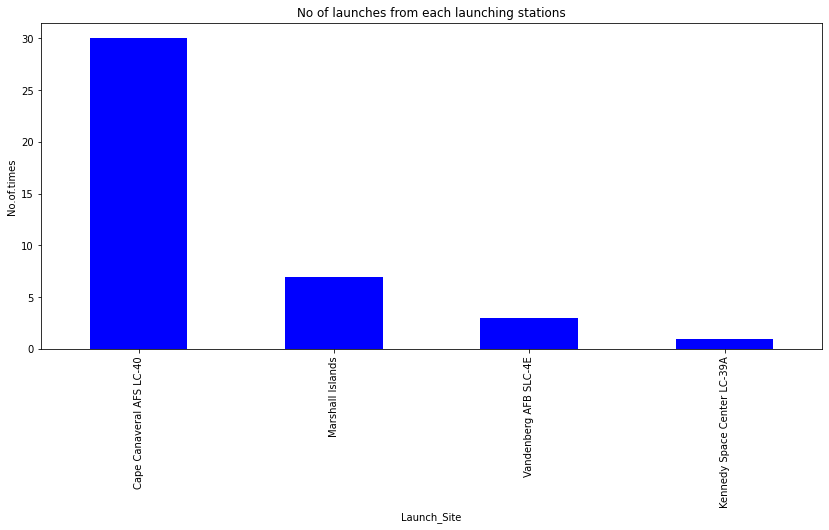

In [20]:
spacex_data.Launch_Site.value_counts().nlargest(10).plot(kind='bar', figsize=(14,6), color='b')
plt.title('No of launches from each launching stations')
plt.ylabel('No.of.times')
plt.xlabel('Launch_Site');

From the above Bar Graph it is indicated that SpaceX done its most of its Launches from 'Cape Canaveral AFS LC-40' Launch Site.
And very least used 'Kennedy Space Center LC-39A' Launch Site..

**Pie Chart to analyse data**



> Now we will use pie chart to analyse some of the qualities of SpaceX.. 



Govt: 51.28205128205128 %
Business:  48.71794871794872 %


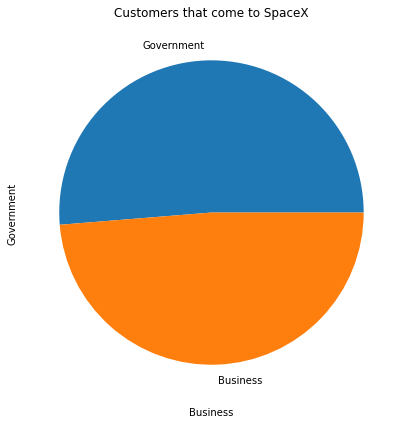

In [29]:
spacex_data['Customer_Type'].value_counts().plot.pie(figsize=(7, 7))
plt.title("Customers that come to SpaceX")
plt.ylabel('Government')
plt.xlabel('Business');

total_data=spacex_data['Customer_Type'].value_counts().sum()
Customer_data=spacex_data['Customer_Type'].value_counts()
percentage_customer_data=(Customer_data[0]/total_data)*100
print("Govt:",percentage_customer_data,'%')
print("Business: ",(100 - percentage_customer_data),'%')

SO, it tells that SpaceX did launch of Government as equal as Business ones..

Success: 80.48780487804879 %
Failure:  19.51219512195121 %


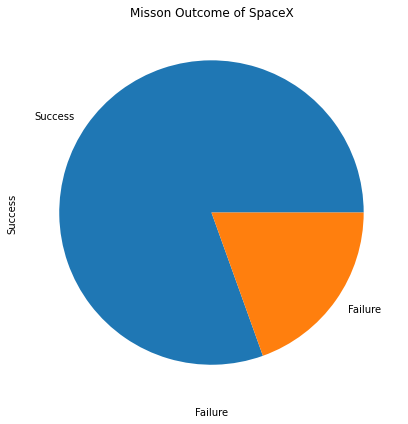

In [32]:
spacex_data['Mission_Outcome'].value_counts().plot.pie(figsize=(7, 7))
plt.title("Misson Outcome of SpaceX")
plt.ylabel('Success')
plt.xlabel('Failure');

total_data=spacex_data['Mission_Outcome'].value_counts().sum()
Mission_data=spacex_data['Mission_Outcome'].value_counts()
percentage_Success_data=(Mission_data[0]/total_data)*100
print("Success:",percentage_Success_data,'%')
print("Failure: ",(100 - percentage_Success_data),'%')

the abuve analysis tells that from all obsevations that did from SpaceX launches "80%" of the misssions are at a great success..

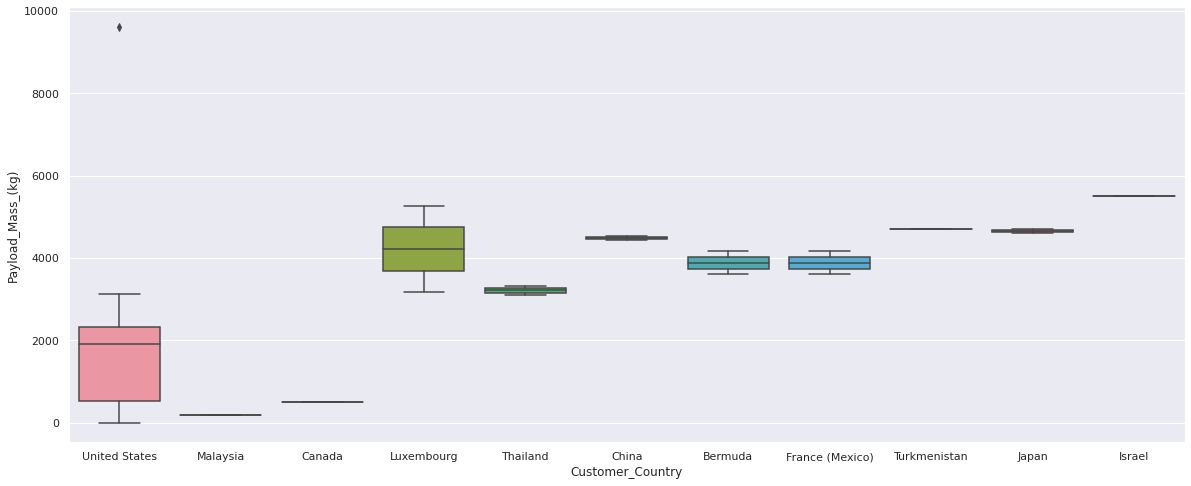

In [38]:
sns.set(rc={"figure.figsize":(20, 8)})
sns.boxplot(x="Customer_Country", y="Payload_Mass_(kg)", data=spacex_data)

from the plot indicates the Payload_mass_(kg) for 
each country that has lauchs in association with SpaceX...


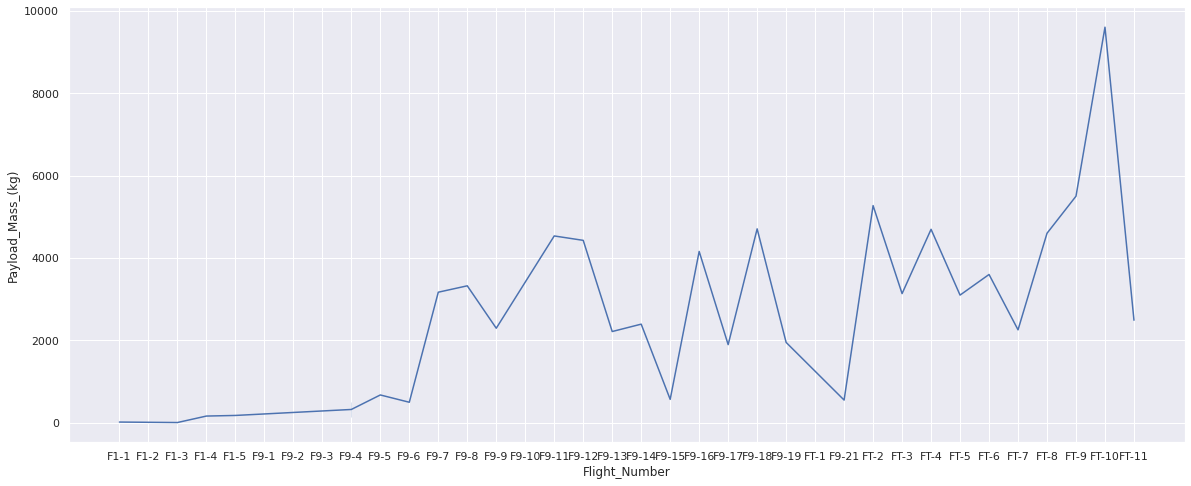

In [42]:
sns.lineplot(x ="Flight_Number", y ="Payload_Mass_(kg)" ,data=spacex_data)

it shows the increase in Payload_Mass_(kg) as from the time goes on ...

# **Conclusion:**


*   From the above analysis we could say that SpaceX used only 4 lauch_sites till now.
*   80% of the Missions done by SpaceX are a great success..
*   From the beginning till now the 41th Flight Launch the Payload_Mass_(kg) has increased in a successful rate in little bit ups and downs.
*   And not only the SpaceX launches flights for Business but it done as equally to Government projects for many countries...



